# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'])
X.info(), y.info(), X.describe(), y.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
0    506 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


(None,
 None,
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
 std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
 min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
 25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
 50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
 75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
 max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   
 
               AGE         DIS         RAD         TAX     PTRATIO           B  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [39]:
sorted([(X[i].corr(y[0]), i) for i in X.columns])

[(-0.7376627261740151, 'LSTAT'),
 (-0.5077866855375621, 'PTRATIO'),
 (-0.4837251600283729, 'INDUS'),
 (-0.4685359335677669, 'TAX'),
 (-0.4273207723732826, 'NOX'),
 (-0.38830460858681154, 'CRIM'),
 (-0.381626230639778, 'RAD'),
 (-0.3769545650045963, 'AGE'),
 (0.17526017719029843, 'CHAS'),
 (0.24992873408590388, 'DIS'),
 (0.33346081965706637, 'B'),
 (0.3604453424505432, 'ZN'),
 (0.6953599470715391, 'RM')]

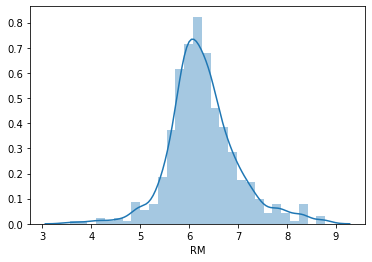

In [41]:
# Your plots here
import seaborn as sns

sns.distplot(X['RM'])

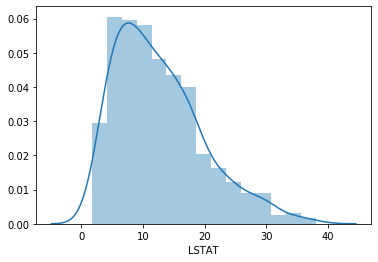

In [43]:
sns.distplot(X['LSTAT'])

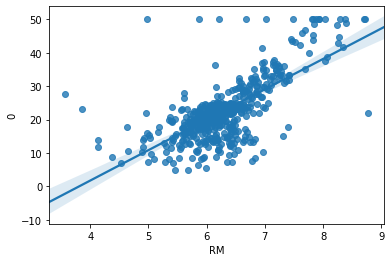

In [48]:
sns.regplot(X['RM'],y[0])

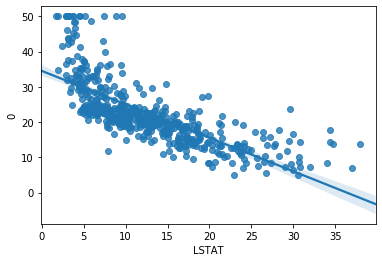

In [49]:
sns.regplot(X['LSTAT'],y[0])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
# yes, since the bigger the number of rooms, it is expected to be more expensive, and
# the higher the low status, less expensive (negative correlation)

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

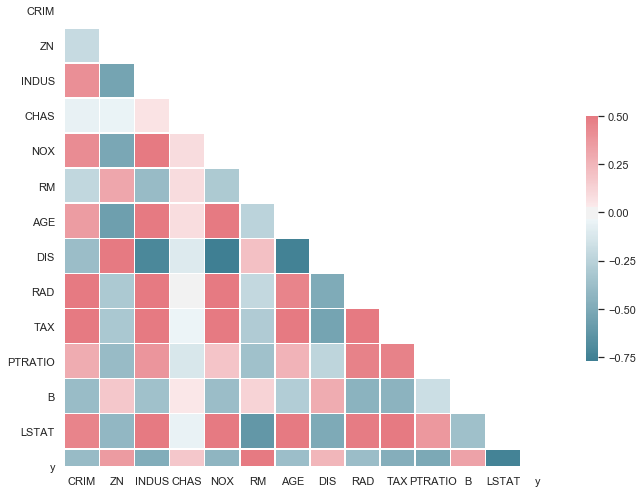

In [59]:
# Your response here
b = X.copy()
b['y'] = y[0]

sns.set(style="white")

corr = b.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [60]:
# Your code here
y.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [61]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return mean_squared_error(y_true, y_predict), r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [78]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [79]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
tr_scores=[]
te_scores=[]
for d in range(1,10):    
    regr = RandomForestRegressor(max_depth=d)
    regr.fit(X_train, y_train)
    te_scores.append(regr.score(X_test,y_test))
    tr_scores.append(regr.score(X_train,y_train))

C:\Users\felip\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\felip\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\felip\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\felip\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\felip\Miniconda3\lib\site-packages\sklearn\ensemble\f

Now, plot the score for each tree on the training set and on the testing set.

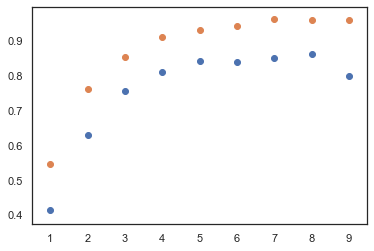

In [81]:
# Produce a plot with the score for the testing and training for the different max depths
plt.scatter(range(1,10), te_scores)
plt.scatter(range(1,10), tr_scores)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
# higher depth get higher scores but more overfitting

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
# high variance and low bias, since it is overfitting, with a high score for the training data.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [82]:
# Your response here
for d in range(1,12):    
    regr = RandomForestRegressor(max_depth=d)
    regr.fit(X_train, y_train)
    print(regr.score(X_train,y_train), regr.score(X_train,y_train) - regr.score(X_test,y_test))
    
# around 3, since it is more optmal considering bias and variance, higher score considering
# the different scores between train and test

C:\Users\felip\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\felip\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\felip\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\felip\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users

0.6028466347831904 0.11817574730771774
0.7611556489561779 0.12317106724703542
0.8640830217254761 0.09191347517736448
0.9103421828596836 0.10314478603877641
0.926767496204624 0.05700435558173944
0.943522392624749

C:\Users\felip\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\felip\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\felip\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\felip\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 0.08841774832851634
0.9512151771342233 0.09886489289186129
0.9597867393729855 0.14187057674708403


C:\Users\felip\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\felip\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\felip\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\felip\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users

0.9576226477635672 0.13537830196419365
0.9610564088178735 0.13922083316375866
0.9675924570737777 0.16018936598361222


C:\Users\felip\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\felip\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\felip\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\felip\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
# not a very good model for today, since the data is old, there could be more parameters,
# like size, bathrooms, floors, and maybe there are some features that doesn't represent
# the value of a house, like nox, and distance from employement centers, maybe we won't have
# much problems with robstness, since we can take care of outliers, but it wouldn't be
# applicable in rural cities, since the features would be very different.
